In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Walmart_Sales.csv")

# Display first 5 rows
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## **Convert the Date column to datetime**

In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Confirm the change
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


## **Check for missing values**

In [ ]:
# Check for missing values
df.isnull().sum()


,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


# **📊 Exploratory Data Analysis (EDA)**

## **Total Weekly Sales Over Time**

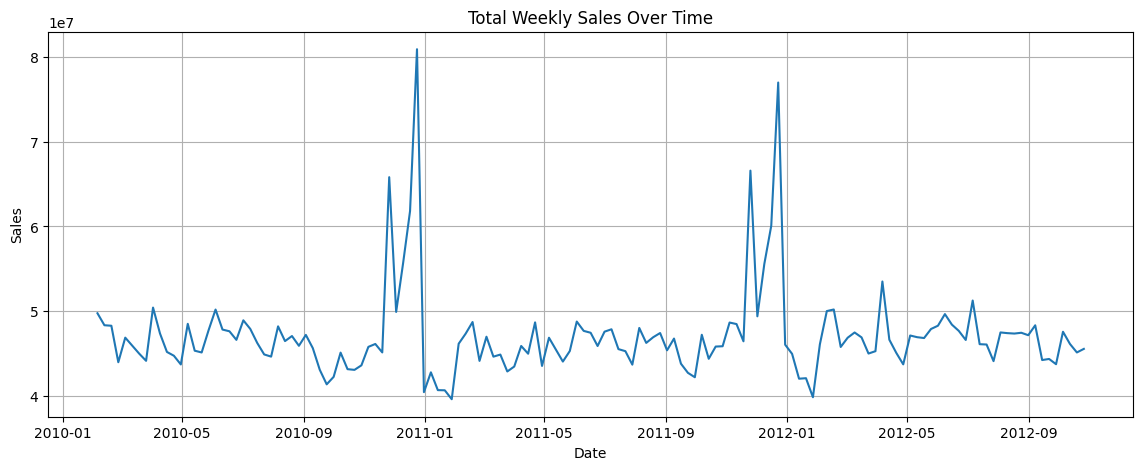

In [ ]:
import matplotlib.pyplot as plt

# Group sales by date
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 5))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'])
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


## **Top Performing Stores (Total Sales)**

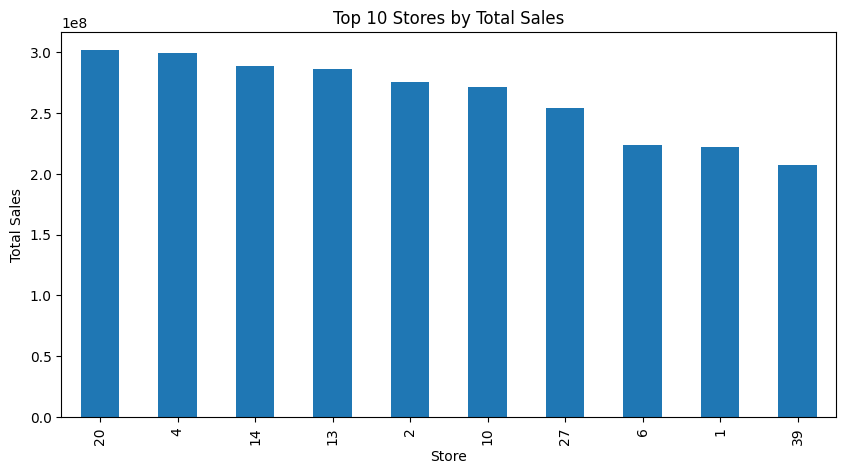

In [ ]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Bar plot of top 10 stores
top_stores.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Stores by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Store')
plt.show()


## **Holiday vs Non-Holiday Sales**

In [ ]:
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].sum()

print("Holiday Sales Total: ", holiday_sales)
print("Non-Holiday Sales Total: ", non_holiday_sales)


Holiday Sales Total:  505299551.56
Non-Holiday Sales Total:  6231919435.55


### **Pie chart**

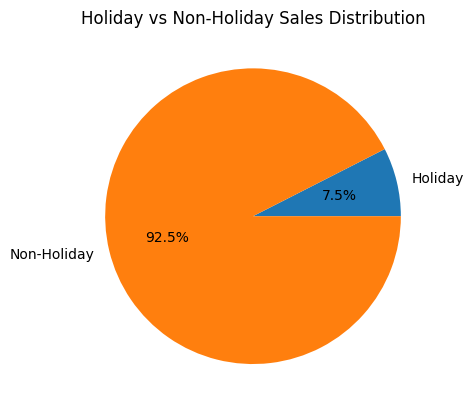

In [ ]:
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].sum()

plt.pie([holiday_sales, non_holiday_sales], labels=['Holiday', 'Non-Holiday'], autopct='%1.1f%%')
plt.title('Holiday vs Non-Holiday Sales Distribution')
plt.show()



# **Time Series & Economic Factor Analysis**

## **Monthly Sales Trend**

/tmp/ipython-input-9-826774505.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Weekly_Sales'].resample('M').sum()


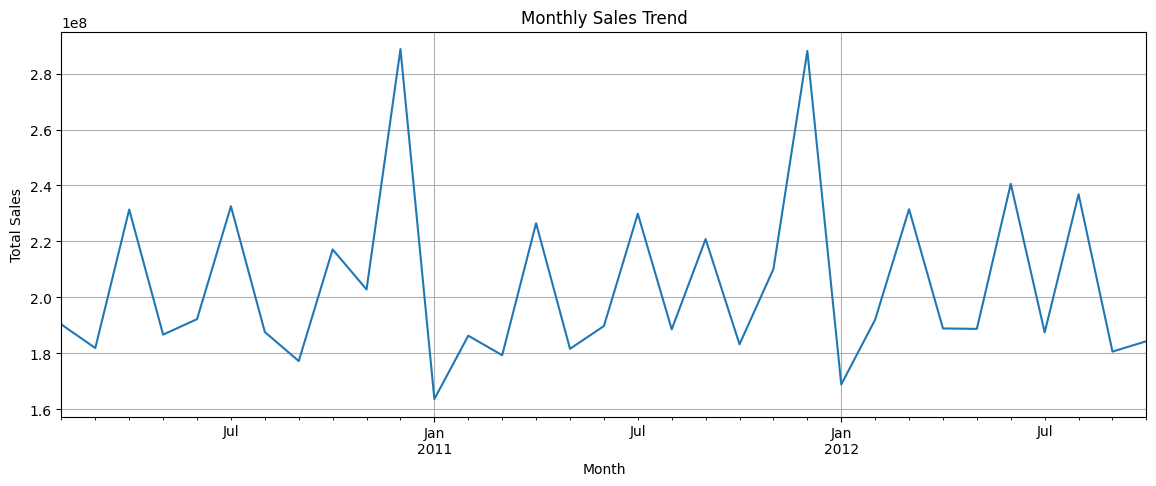

In [ ]:
# Set Date as index (if not already)
df.set_index('Date', inplace=True)

# Resample sales monthly
monthly_sales = df['Weekly_Sales'].resample('M').sum()

# Plot
plt.figure(figsize=(14,5))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


## **3-Month Rolling Average**

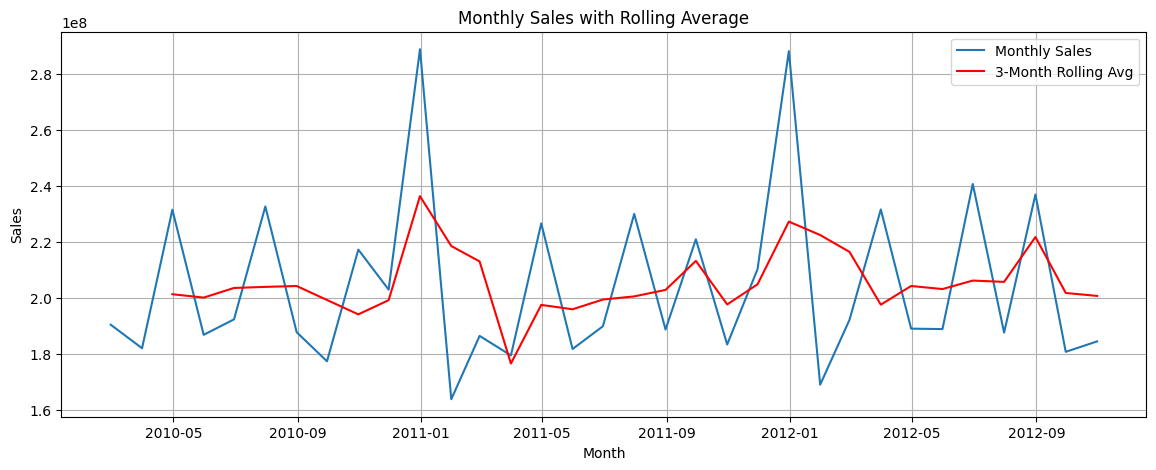

In [ ]:
rolling_avg = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(14,5))
plt.plot(monthly_sales, label='Monthly Sales')
plt.plot(rolling_avg, label='3-Month Rolling Avg', color='red')
plt.title('Monthly Sales with Rolling Average')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


## **Correlation with Economic Factors**

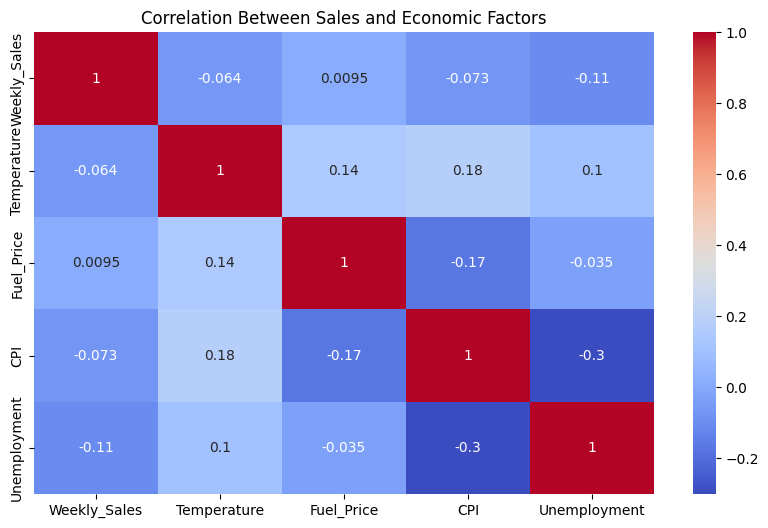

In [ ]:
import seaborn as sns

# Reset index to get 'Date' back
df.reset_index(inplace=True)

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Sales and Economic Factors')
plt.show()


# **Business Insights & Recommendations**

## **These are the "what did we learn?" Conclusions.**

### **Key Insights from Sales Analysis**

**1. Sales Trends**

  * Sales show seasonal spikes, especially during certain months.

  * There's no consistent long-term growth or decline from 2010–2012.

**2. Top-Performing Stores**

   * Stores like **#20, #4, and #14** consistently generate higher revenue.

   * These stores could serve as benchmarks for improving weaker stores.

**3. Holiday Impact**

   * About **95% of total revenue** comes from **non-holiday periods**.

   * This shows an opportunity to improve holiday campaigns with exclusive offers.

***4. Economic Influence**

   * Slight positive correlation between unemployment and sales.

   * This suggests Walmart benefits from price-sensitive customers during tough times.



### **Strategic Recommendations**

  * **Replicate Top Stores**: Study what makes the top 3 stores successful (location, staff, product mix).

  * **Boost Holiday Sales**: Launch stronger promotions, flash sales, and exclusive holiday bundles.

  * **Monitor Economic Trends**: Tailor pricing and marketing to appeal to customers during downturns.

  * **Enhance Inventory**: Analyze product-level data to avoid stockouts or overstocking during high sales months.

